Importing pandas, numpy, matplotlib and and several packages from the sklearn library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

The data came from Japan's e-Statics website. The csv file contains some miscellaneous information as the first 8 rows. We use skiprows to avoid any read errors.

In [2]:
df = pd.read_csv('data/FEI_PREF_190228112345.csv', skiprows=8)

Lets take a look at what our data looks like using pandas head() to see the top 5 rows & tail() to see the last 5 rows; two important commands to run to get a good look at your dataframe.

In [3]:
df.head()

,AREA Code,AREA,YEAR Code,YEAR,/ITEMS,A1101_Total population (Both sexes)[person],Annotation,A110101_Total population (Male)[person],Annotation.1,A110102_Total population (Female)[person],Annotation.2,A4101_Live births[person],Annotation.3,A4200_Deaths[person],Annotation.4,#A05203_Total fertility rate[-],Annotation.5
0,47000,Okinawa-ken,1995100000,1995,NaN,1273440,NaN,624737,NaN,648703,NaN,16751,NaN,7283,NaN,1.87,NaN
1,47000,Okinawa-ken,1996100000,1996,NaN,1282000,NaN,629000,NaN,653000,NaN,17064,NaN,7038,NaN,1.86,NaN
2,47000,Okinawa-ken,1997100000,1997,NaN,1289000,NaN,633000,NaN,657000,NaN,16614,NaN,7381,NaN,1.81,NaN
3,47000,Okinawa-ken,1998100000,1998,NaN,1298000,NaN,637000,NaN,661000,NaN,16928,NaN,7643,NaN,1.83,NaN
4,47000,Okinawa-ken,1999100000,1999,NaN,1308000,NaN,642000,NaN,665000,NaN,16680,NaN,7880,NaN,1.79,NaN


In [4]:
df.tail()

,AREA Code,AREA,YEAR Code,YEAR,/ITEMS,A1101_Total population (Both sexes)[person],Annotation,A110101_Total population (Male)[person],Annotation.1,A110102_Total population (Female)[person],Annotation.2,A4101_Live births[person],Annotation.3,A4200_Deaths[person],Annotation.4,#A05203_Total fertility rate[-],Annotation.5
17,47000,Okinawa-ken,2012100000,2012,NaN,1411000,NaN,693000,NaN,719000,NaN,17074,NaN,10626,NaN,1.90,NaN
18,47000,Okinawa-ken,2013100000,2013,NaN,1419000,NaN,697000,NaN,722000,NaN,17209,NaN,10956,NaN,1.94,NaN
19,47000,Okinawa-ken,2014100000,2014,NaN,1426000,NaN,700000,NaN,725000,NaN,16373,NaN,11361,NaN,1.86,NaN
20,47000,Okinawa-ken,2015100000,2015,NaN,1433566,NaN,704619,NaN,728947,NaN,16941,NaN,11326,NaN,1.96,NaN
21,47000,Okinawa-ken,2016100000,2016,NaN,1439000,NaN,708000,NaN,732000,NaN,16617,NaN,11706,NaN,1.95,NaN


Now lets look at the kind of info inside the dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 17 columns):
AREA Code                                      22 non-null int64
AREA                                           22 non-null object
YEAR Code                                      22 non-null int64
YEAR                                           22 non-null int64
/ITEMS                                         0 non-null float64
A1101_Total population (Both sexes)[person]    22 non-null int64
Annotation                                     0 non-null float64
A110101_Total population (Male)[person]        22 non-null int64
Annotation.1                                   0 non-null float64
A110102_Total population (Female)[person]      22 non-null int64
Annotation.2                                   0 non-null float64
A4101_Live births[person]                      22 non-null int64
Annotation.3                                   0 non-null float64
A4200_Deaths[person]                          

There is a lot of columns that aren't required for our analysis. We can drop those from the dataframe. I went simple with just the single dropna command to find any columns with NaN values.

In [6]:
df = df.dropna(axis = 'columns')

Lets see what it looks like now.

In [7]:
df.head()

,AREA Code,AREA,YEAR Code,YEAR,A1101_Total population (Both sexes)[person],A110101_Total population (Male)[person],A110102_Total population (Female)[person],A4101_Live births[person],A4200_Deaths[person],#A05203_Total fertility rate[-]
0,47000,Okinawa-ken,1995100000,1995,1273440,624737,648703,16751,7283,1.87
1,47000,Okinawa-ken,1996100000,1996,1282000,629000,653000,17064,7038,1.86
2,47000,Okinawa-ken,1997100000,1997,1289000,633000,657000,16614,7381,1.81
3,47000,Okinawa-ken,1998100000,1998,1298000,637000,661000,16928,7643,1.83
4,47000,Okinawa-ken,1999100000,1999,1308000,642000,665000,16680,7880,1.79


Before we have a look at our dataframe, lets drop the columns AREA Code, AREA and YEAR Code. These are just taking up extra space and I already know all this data is for prefecture Okinawa.

In [8]:
df.drop(['AREA Code', 'AREA', 'YEAR Code'], axis=1, inplace=True)

Again, before we look at our finish dataframe product, lets do the final cleaning of the remaining column names to make them a bit more readable. I'm going to use the new pandas method of set_axis. I'm also going to drop the FERTILITY RATE column since I don't think I'll need it.

In [9]:
df.set_axis(['YEAR', 'TOTAL POP', 'MALE POP', 'FEMALE POP', 'BIRTHS', 'DEATHS', 'FERTILITY RATE'], axis='columns', inplace=True)
df.drop(['FERTILITY RATE'], axis=1, inplace=True)

Now lets take a look at the dataframe head() again.

In [10]:
df.head()

,YEAR,TOTAL POP,MALE POP,FEMALE POP,BIRTHS,DEATHS
0,1995,1273440,624737,648703,16751,7283
1,1996,1282000,629000,653000,17064,7038
2,1997,1289000,633000,657000,16614,7381
3,1998,1298000,637000,661000,16928,7643
4,1999,1308000,642000,665000,16680,7880


Looks sharp. Now lets check the shape and info one final time.

In [11]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
YEAR          22 non-null int64
TOTAL POP     22 non-null int64
MALE POP      22 non-null int64
FEMALE POP    22 non-null int64
BIRTHS        22 non-null int64
DEATHS        22 non-null int64
dtypes: int64(6)
memory usage: 1.1 KB


(22, 6)

Just making sure our values are still INTEGER datatypes. Lets do a quick and dirty plot.

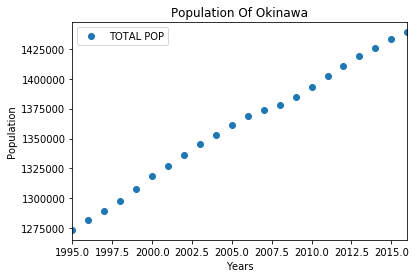

In [12]:
df.plot(x='YEAR', y='TOTAL POP', style='o')
plt.title('Population Of Okinawa')
plt.xlabel('Years')
plt.ylabel('Population')
plt.show()

Neat. Now lets look at Births and Deaths on a line graph.

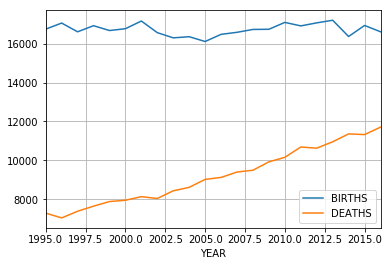

In [13]:
df.plot(x='YEAR', y=['BIRTHS', 'DEATHS'], grid=True)

Deaths seem to be on the rise Interesting. Lets see a stacked bar graph of the MALE and FEMALE numbers.

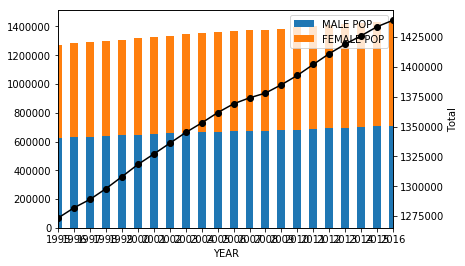

In [14]:
df.plot(x='YEAR', y=['MALE POP', 'FEMALE POP'], stacked=True, kind='bar')
ax = df['TOTAL POP'].plot(secondary_y=True, color='k', marker='o')
ax.set_ylabel('Total')
plt.show()

It is indeed ugly, but lucky for me I remembered to sort the data by year at extraction. If I didn't, the newest year would be on top and this chart would be reversed. In that case I would have to run step slice. [start:end:step] so the first two are blank and -1 is in the step slice. Therefore the entire dataframe is copied over in reverse order. Thanks to user Grote in the Python Discord for the help!

df = df.iloc[::-1]

followed by this to reset the index and drop=True to note we are getting rid of the old index.

df = df.reset_index(drop=True)

Also, stacking the male and female population really didn't give us information of course because they are stacked and based upon one another for the total. A line graph is better to see the difference.

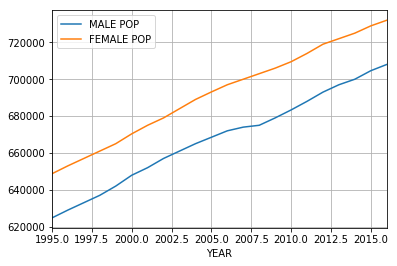

In [15]:
df.plot(x='YEAR', y=['MALE POP', 'FEMALE POP'], grid=True)

Interesting. Just by looking at this simple graph, we can see that there is a gap which might be growing between population of women and men. Also, while the women population is quite normal, the men's population had a slightly noticeable decrease sometime before 2010, maybe 2008. Let me remember how many rows we have of data.

In [16]:
df.shape

(22, 6)

Oh right, 22. Ok. So let me look at the bottom 15 rows using slice again.

In [17]:
df.iloc[-15:]

,YEAR,TOTAL POP,MALE POP,FEMALE POP,BIRTHS,DEATHS
7,2002,1336000,657000,679000,16571,8037
8,2003,1345000,661000,684000,16303,8433
9,2004,1353000,665000,689000,16362,8610
10,2005,1361594,668502,693092,16115,9021
11,2006,1369000,672000,697000,16483,9121
12,2007,1374000,674000,700000,16588,9399
13,2008,1378000,675000,703000,16736,9492
14,2009,1385000,679000,706000,16744,9923
15,2010,1392818,683328,709490,17098,10156
16,2011,1402000,688000,714000,16918,10686


Great, 2008 is in there with some years to chew on the top. Lets find the percentage change in this little part of the dataset to see how much that slow down was and exactly where it was. Now lets use loc to show only a part of the dataframe and pct_change to find the percentage change from previous year to next. Finally, we'll multiply it all by 100 to get the decimal in a place to actually see the percentage and do the conversion in our head.

In [18]:
df.loc[7::,['MALE POP', 'FEMALE POP']].pct_change() * 100

,MALE POP,FEMALE POP
7,NaN,NaN
8,0.608828,0.736377
9,0.605144,0.730994
10,0.526617,0.593904
11,0.523259,0.563850
12,0.297619,0.430416
13,0.148368,0.428571
14,0.592593,0.426743
15,0.637408,0.494334
16,0.683713,0.635668


You can see that while the FEMALE percentage change from these years is generally above .4 percent, the MALE had a slow down at index 13 which is year 2008. The change dropped down to .001484 here. OK. Now lets move on to predictions! Lets look at the whole dataframe one more time.

In [19]:
df

,YEAR,TOTAL POP,MALE POP,FEMALE POP,BIRTHS,DEATHS
0,1995,1273440,624737,648703,16751,7283
1,1996,1282000,629000,653000,17064,7038
2,1997,1289000,633000,657000,16614,7381
3,1998,1298000,637000,661000,16928,7643
4,1999,1308000,642000,665000,16680,7880
5,2000,1318220,647877,670343,16773,7946
6,2001,1327000,652000,675000,17169,8132
7,2002,1336000,657000,679000,16571,8037
8,2003,1345000,661000,684000,16303,8433
9,2004,1353000,665000,689000,16362,8610


Just going to run some graphs to see if there are any two variables with linear relationships. If there is, the linear regression model might be feasible.

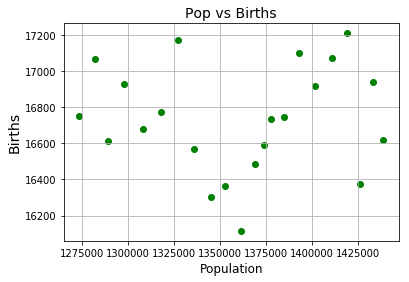

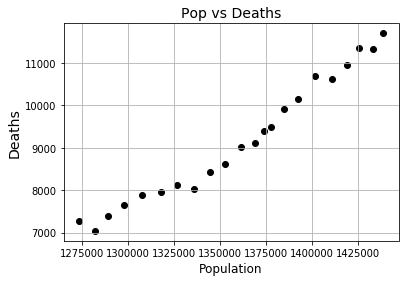

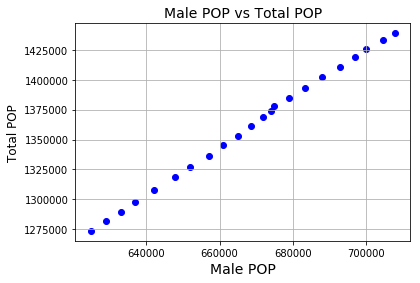

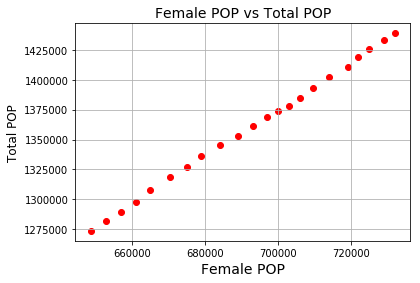

In [21]:
plt.scatter(df['TOTAL POP'], df['BIRTHS'], color = 'green')
plt.title('Pop vs Births', fontsize = 14)
plt.xlabel('Population', fontsize = 12)
plt.ylabel('Births', fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(df['TOTAL POP'], df['DEATHS'], color = 'black')
plt.title('Pop vs Deaths', fontsize = 14)
plt.xlabel('Population', fontsize = 12)
plt.ylabel('Deaths', fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(df['MALE POP'], df['TOTAL POP'], color = 'blue')
plt.title('Male POP vs Total POP', fontsize = 14)
plt.xlabel('Male POP', fontsize = 14)
plt.ylabel('Total POP', fontsize = 12)
plt.grid(True)
plt.show()

plt.scatter(df['FEMALE POP'], df['TOTAL POP'], color = 'red')
plt.title('Female POP vs Total POP', fontsize = 14)
plt.xlabel('Female POP', fontsize = 14)
plt.ylabel('Total POP', fontsize = 12)
plt.grid(True)
plt.show()

So the Population vs Death seems like the best option to try a linear regression model. First, since we are only dealing with two variables, lets set one as X and one as y.

The X variable will be the Attribute or Independent variable. These are what change the dependent variable.
The y variable will be the Label or Dependent variable. This is the variable we will try to predict.

Also, since sklear expects these to be in pandas dataframes and pandas series so we need to reshape them. Again, slicing to ensure we reshape to get all rows of the column inside a pandas set.

In [30]:
X = df['TOTAL POP'].values.reshape(-1, 1)
y = df['DEATHS'].values.reshape(-1, 1)

We can print them out just to see how they appear for the Sklearn library.

In [31]:
print(X)

[[1273440]
 [1282000]
 [1289000]
 [1298000]
 [1308000]
 [1318220]
 [1327000]
 [1336000]
 [1345000]
 [1353000]
 [1361594]
 [1369000]
 [1374000]
 [1378000]
 [1385000]
 [1392818]
 [1402000]
 [1411000]
 [1419000]
 [1426000]
 [1433566]
 [1439000]]


In [32]:
print(y)

[[ 7283]
 [ 7038]
 [ 7381]
 [ 7643]
 [ 7880]
 [ 7946]
 [ 8132]
 [ 8037]
 [ 8433]
 [ 8610]
 [ 9021]
 [ 9121]
 [ 9399]
 [ 9492]
 [ 9923]
 [10156]
 [10686]
 [10626]
 [10956]
 [11361]
 [11326]
 [11706]]


Now we split the data into a training set and test set. As you can see the labels are properly noted X_train and X_test followed by y respectively. The size is .2 to create a split of 80% training set and 20% test set. Random_state is only used as the seed for a random number generator. This is used by np.random. Does not apply to our model or case.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Naming the LinearRegression class as regressor for easy usage.

In [37]:
regressor = LinearRegression()

Using LinearRegression class to train the algorithm.

In [38]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now that the algorithm is trained, we can extract the intercepts and coefficients.

In [39]:
print(regressor.intercept_)

[-29279.3538973]


In [40]:
print(regressor.coef_) # for every one unit of change in Population, the change in Deaths is .02%.

[[0.02829686]]


Intercept is the y-intercept or B0 in the regression formula. It is the value of y if X is equal to 0. So in this case, if the Total Population is 0, we can expect our Deaths to be at -29,279. Of course this isn't very useful so in our case, it just sets the regression line properly.

I know coefficients mean that for every change in X, y changes by that much percent. It is the independent's variable effect on the dependent variable. So here, for every unit change in population, the death rate is affected .02%. We can already see that this isn't going to be a good model.

Moving on, lets make the prediction and set it to y_pred. Again, using the regression class renamed to regressor.

In [41]:
y_pred = regressor.predict(X_test)

Now we'll make a new dataframe to compare the test to the prediction for the y variable, or in our case, Deaths.

In [42]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,11326,11286.060118
1,9021,9249.478630
2,9923,9911.794896
3,9492,9713.716887
4,7038,6997.218487


As you can see, the predictions are pretty close in my opinion. Now lets plot this predition and also look at some metrics for the model.

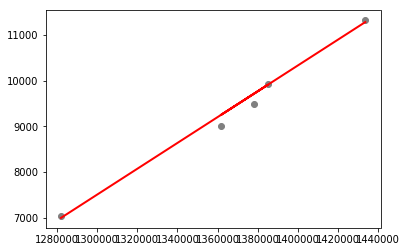

In [43]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 108.42440326818033
Mean Squared Error: 20948.948530943733
Root Mean Squared Error: 144.73751597614122


The MAE just represents the average error.

The MSE is just like MAE except there is more emphasis on exaggerating large errors.

The RMSE is like MSE except square rooted to make it easier to under.

#### I learned a lot here. My next project will be to find a better dataset to create a better linear regression model or even, a multile linear regression model. I believe population metrics isn't suited well for linear regression with the data I was able to find (ie. deaths & births). Also, Okinawa was only about to provide good data for the past 20 plus years. I might return to this data in the future once I'm more experienced to see if I can extract any other useful models or information.

# March 6, 2019, 1249